In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import VGG19

from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers

%matplotlib inline

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
data_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = data_generator.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/ml2021/data03/train",
    target_size=(224,224),
    batch_size = 8,
    class_mode='categorical')

Found 988 images belonging to 3 classes.


In [ ]:
valid_generator = data_generator.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/ml2021/data03/valid",
    target_size=(224,224),
    batch_size = 8,
    class_mode='categorical')

Found 246 images belonging to 3 classes.


In [ ]:
test_generator = data_generator.flow_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/ml2021/data03/test",
    target_size=(224,224),
    batch_size = 8,
    class_mode='categorical')

Found 298 images belonging to 3 classes.


In [ ]:
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=3
)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=124,
            epochs=60,
            validation_data=valid_generator,
            validation_steps=30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/60
124/124 [==============================] - 1355s 11s/step - loss: 1.2232 - accuracy: 0.5830 - val_loss: 3.0656 - val_accuracy: 0.2333
Epoch 2/60
124/124 [==============================] - 206s 2s/step - loss: 0.8453 - accuracy: 0.6518 - val_loss: 1.6678 - val_accuracy: 0.2333
Epoch 3/60
124/124 [==============================] - 204s 2s/step - loss: 0.7682 - accuracy: 0.6731 - val_loss: 1.5950 - val_accuracy: 0.3083
Epoch 4/60
124/124 [==============================] - 204s 2s/step - loss: 0.7776 - accuracy: 0.6953 - val_loss: 2.6324 - val_accuracy: 0.3167
Epoch 5/60
124/124 [==============================] - 204s 2s/step - loss: 0.7308 - accuracy: 0.6923 - val_loss: 0.9201 - val_accuracy: 0.6583
Epoch 6/60
124/124 [==============================] - 203s 2s/step - loss: 0.6964 - accuracy: 0.6852 - val_loss: 6.8969 - val_accuracy: 0.5208
Epoch 7/60
124/124 [==============================] - 203s 2s/step - loss: 0.7396 - accuracy: 0.6923 - val_loss: 5.2515 - val_accuracy: 0.51

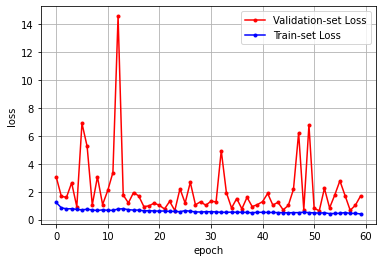

In [ ]:
import numpy

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [26]:
print("-- Evaluate --")
scores = model.evaluate(test_generator, steps=37)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

-- Evaluate --
37/37 [==============================] - 306s 9s/step - loss: 1.4397 - accuracy: 0.5507
accuracy: 55.07%
